In [63]:
#importing required libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TIME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
reviews_df=pd.read_csv('sample30.csv',encoding='latin-1')

In [65]:
reviews_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [66]:
#EDA
#Lets check the overview of the data present
print('no. of rows: ', reviews_df.shape[0])
print('no. of columns: ', reviews_df.shape[1])
print('\n Total Features: ', reviews_df.columns.to_list())
print('\n Missing Values: ', reviews_df.isnull().values.sum())
print('\n Unique Values: \n', reviews_df.nunique())

no. of rows:  30000
no. of columns:  15

 Total Features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

 Missing Values:  74980

 Unique Values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [67]:
#Lets check the info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [68]:
#Looking into the sum of missing values in every column
reviews_df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [69]:
reviews_df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

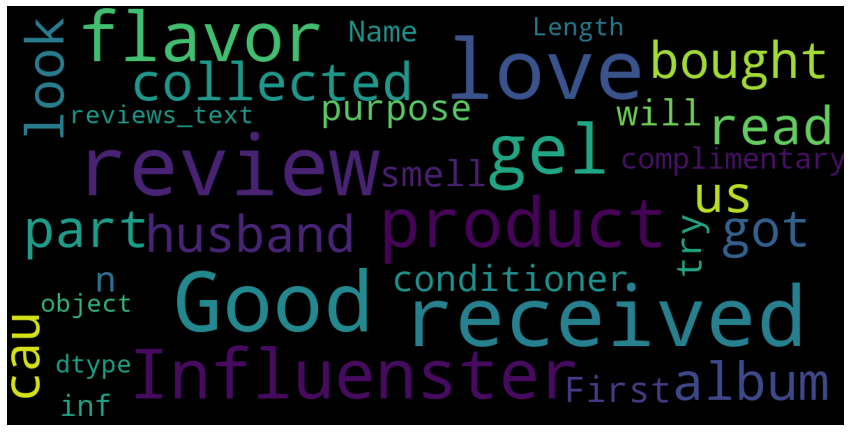

In [70]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def most_commonword(data, title = None):
    wcloud_obj = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wcloud_obj)
    plt.show()

most_commonword(reviews_df['reviews_text'])

In [71]:
reviews_df['reviews_rating'].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

Text(0.5, 1.0, 'Ratings Distribution')

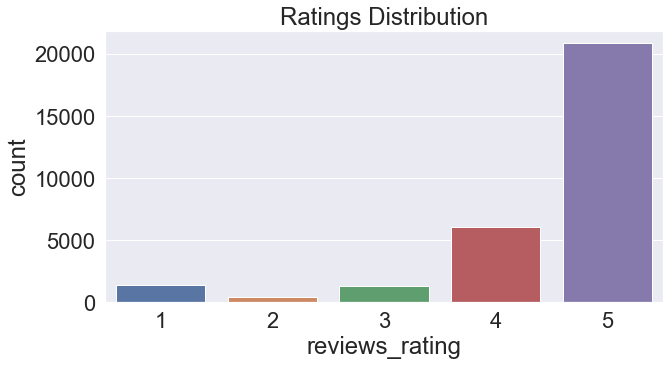

In [72]:
import seaborn as sns
plt.figure(figsize=[10,5])
ax = sns.countplot(x="reviews_rating", data=reviews_df)
plt.title('Ratings Distribution')

In [73]:
reviews_df['reviews_len']=reviews_df['reviews_text'].apply(len)

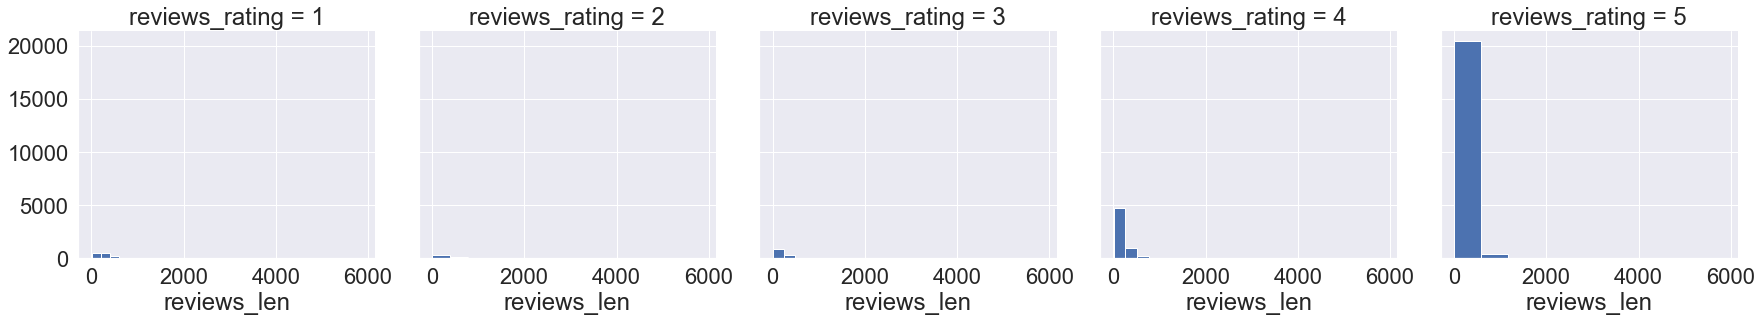

In [74]:
sns.set(font_scale=2.0)

g = sns.FacetGrid(reviews_df,col='reviews_rating',size=5)
g.map(plt.hist,'reviews_len')
reviews_df.drop(columns='reviews_len',inplace=True)

In [75]:
reviews_df['reviews_didPurchase'].fillna("null",inplace=True)

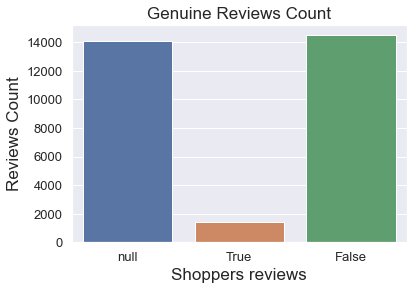

In [76]:
ax = sns.countplot(reviews_df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers reviews", fontsize=17)
ax.set_ylabel(ylabel='Reviews Count', fontsize=17)
ax.axes.set_title('Genuine Reviews Count', fontsize=17)
ax.tick_params(labelsize=13)

In [77]:
reviews_df['reviews_didPurchase'].value_counts(normalize=True)

False    0.483267
null     0.468933
True     0.047800
Name: reviews_didPurchase, dtype: float64

In [78]:
#sns.set(font_scale=1.4)
#plt.figure(figsize = (10,5))
#sns.heatmap(reviews_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [79]:
purchased_df = reviews_df[reviews_df['reviews_didPurchase'] == True]
purchased_df['name'].value_counts()

Hormel Chili, No Beans                                   91
Coty Airspun Face Powder, Translucent Extra Coverage     87
Chester's Cheese Flavored Puffcorn Snacks                77
Tostitos Bite Size Tortilla Chips                        59
Lysol Concentrate Deodorizing Cleaner, Original Scent    55
                                                         ..
Simple Green All-Purpose Cleaner, 16oz                    1
Suave Professionals Hair Conditioner, Sleek               1
Progresso Traditional Chicken Tuscany Soup                1
Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black         1
Tai Pei Sweet & Sour Chicken                              1
Name: name, Length: 144, dtype: int64

In [80]:
max_ratings=purchased_df[purchased_df['reviews_rating'] == 5]
max_ratings['name'].value_counts()


Coty Airspun Face Powder, Translucent Extra Coverage     74
Chester's Cheese Flavored Puffcorn Snacks                72
Hormel Chili, No Beans                                   55
Lysol Concentrate Deodorizing Cleaner, Original Scent    51
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks       45
                                                         ..
RC Cola, 12oz                                             1
Orajel Maximum Strength Toothache Pain Relief Liquid      1
D-Con Mice Bait Station - 3ct                             1
Black Front Loading Frame Set (8.5x11) Set Of 12          1
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1       1
Name: name, Length: 131, dtype: int64

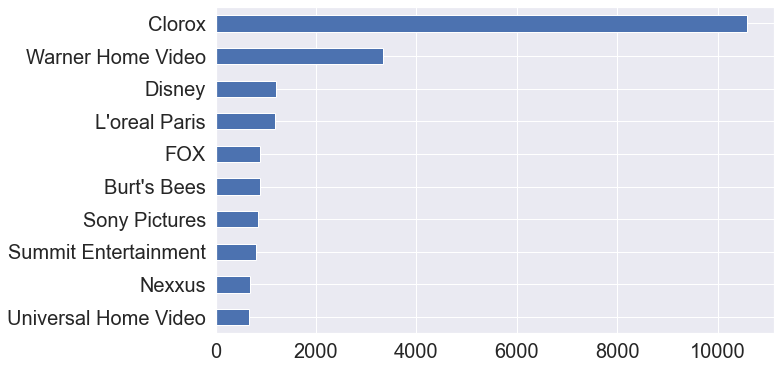

In [81]:
reviews_df['brand'].value_counts()[0:10].plot(kind='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [82]:
reviews_df['reviews_text'] = reviews_df['reviews_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews_df['reviews_text'].head()

0    i love this album. it's very good. more to the...
1    good flavor. this review was collected as part...
2                                         good flavor.
3    i read through the reviews on here before look...
4    my husband bought this gel for us. the gel cau...
Name: reviews_text, dtype: object

In [83]:
reviews_df['reviews_text'] = reviews_df['reviews_text'].str.replace('[^\w\s]','')
reviews_df['reviews_text'].head()

0    i love this album its very good more to the hi...
1    good flavor this review was collected as part ...
2                                          good flavor
3    i read through the reviews on here before look...
4    my husband bought this gel for us the gel caus...
Name: reviews_text, dtype: object

In [84]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
reviews_df['reviews_text'] = reviews_df['reviews_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
reviews_df['reviews_text'].head()

0    love album good hip hop side current pop sound...
1          good flavor review collected part promotion
2                                          good flavor
3    read reviews looking buying one couples lubric...
4    husband bought gel us gel caused irritation fe...
Name: reviews_text, dtype: object

In [85]:
freq_ten = pd.Series(' '.join(reviews_df['reviews_text']).split()).value_counts()[:10]
freq_ten

review       9113
part         9046
great        8865
promotion    8747
collected    8745
love         8348
use          7946
product      7670
movie        6233
wipes        5204
dtype: int64

In [86]:
freq_ten = list(freq_ten.index)
reviews_df['reviews_text'] = reviews_df['reviews_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_ten))
reviews_df['reviews_text'].head()

0    album good hip hop side current pop sound hype...
1                                          good flavor
2                                          good flavor
3    read reviews looking buying one couples lubric...
4    husband bought gel us gel caused irritation fe...
Name: reviews_text, dtype: object

In [87]:
freq_rare = pd.Series(' '.join(reviews_df['reviews_text']).split()).value_counts()[-10:]
freq_rare

mesmerized    1
cleanable     1
colonels      1
rebought      1
bulge         1
flavours      1
traditions    1
redtoo        1
surfing       1
oppose        1
dtype: int64

In [88]:
freq_rare = list(freq_rare.index)
reviews_df['reviews_text'] = reviews_df['reviews_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare))
reviews_df['reviews_text'].head()

0    album good hip hop side current pop sound hype...
1                                          good flavor
2                                          good flavor
3    read reviews looking buying one couples lubric...
4    husband bought gel us gel caused irritation fe...
Name: reviews_text, dtype: object

In [89]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TIME\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [90]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
reviews_df['reviews_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        album good hip hop side current pop sound hype...
1                                              good flavor
2                                              good flavor
3        read review look buy one coupl lubric ultim di...
4        husband bought gel us gel caus irrit felt like...
                               ...                        
29995    got condition influenst tri im love far oili h...
29996    receiv purpos influenst leav hair feel fresh s...
29997    first smell wash hair smooth easi brush receiv...
29998    receiv influenst never go back anyth els norma...
29999    receiv complimentari influenst realli save hai...
Name: reviews_text, Length: 30000, dtype: object

In [91]:
from textblob import Word
reviews_df['reviews_text'] = reviews_df['reviews_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews_df['reviews_text'].head()

0    album good hip hop side current pop sound hype...
1                                          good flavor
2                                          good flavor
3    read review looking buying one couple lubrican...
4    husband bought gel u gel caused irritation fel...
Name: reviews_text, dtype: object

In [92]:
reviews_df['user_sentiment']=reviews_df['user_sentiment'].map({"Positive":1,"Negative":0})

In [93]:
reviews_df = reviews_df.dropna(subset=['user_sentiment'])
df_final=reviews_df.copy()

In [94]:
df_final['reviews_rating'].min()

1

In [95]:
X = reviews_df['reviews_text']
y = reviews_df['user_sentiment']

In [96]:
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 43

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (23999,)
y_train (23999,)
X_test (6000,)
y_test (6000,)


In [97]:
y_train.value_counts()

1.0    21288
0.0     2711
Name: user_sentiment, dtype: int64

In [98]:
y_train.unique()

array([1., 0.])

In [99]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
import pickle
tfidf_vect = TfidfVectorizer()
train_tfidf = tfidf_vect.fit_transform(X_train)
test_tfidf=tfidf_vect.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [102]:
from sklearn.model_selection import GridSearchCV
LRModel=LogisticRegression(class_weight={0:0.6,1:0.4},random_state=seed)

In [103]:
def FitModel(alg, X_train, y_train):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    

In [104]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
def GridCV(alg,X_train,y_train):
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l1','l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    #weights=np.linspace(0.0,0.99,200)
    #class_wt=[{0:x, 1:1.0-x} for x in weights]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=alg, param_grid=grid, n_jobs=-1, cv=cv,error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [105]:
def PredictSentimentsWithProbability(model,X,y,prob):
    # Funtion to predict the sentiments using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'sentiments':y, 'sentiments_prob':pred_probs})
    y_df['final_predicted'] = y_df['sentiments_prob'].map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    ModelMetrics(y_df.sentiments,y_df.final_predicted)
    return y_df

In [106]:
def ModelMetrics(actual_sentiments=False,pred_sentiments=False):

    confusion = metrics.confusion_matrix(actual_sentiments, pred_sentiments)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting positive when customer is negative
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_sentiments, pred_sentiments )))
    

In [107]:
def PlotOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as positive/negative
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.sentiments_prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.sentiments, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()


In [108]:
def PlotROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs)
                                     
    auc_score = metrics.auc( fpr,tpr)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [46]:
GridCV(LRModel,train_tfidf,y_train)

Best: 0.910510 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.893051 (0.005841) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.904663 (0.005048) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.904982 (0.004967) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.904690 (0.005074) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.910149 (0.004402) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.910482 (0.004531) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910510 (0.004448) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910468 (0.004499) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C':

In [109]:
LRModel2=LogisticRegression(C=10,class_weight={0:0.6,1:0.4},penalty='l2',random_state=seed)

In [110]:
FitModel(LRModel2,train_tfidf,y_train)
y_pred_train=LRModel2.predict(train_tfidf)
ModelMetrics(y_train,y_pred_train)


Model Report
Accuracy : 0.9611
Recall/Sensitivity : 0.9889
Sensitivity/Recall : 0.9889139421270199
Specificity: 0.7428992991516046
False Positive Rate: 0.2571007008483954
Positive predictive value: 0.9679525495425078
Negative Predictive value: 0.8951111111111111
sklearn precision score value: 0.9679525495425078


In [111]:
# predictions on Test data
y_pred_test=LRModel2.predict(test_tfidf)
ModelMetrics(y_test,y_pred_test)

Sensitivity/Recall : 0.9758607784431138
Specificity: 0.4451219512195122
False Positive Rate: 0.5548780487804879
Positive predictive value: 0.9347553324968633
Negative Predictive value: 0.6935866983372921
sklearn precision score value: 0.9347553324968633


In [112]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_test)))
print("Recall : {}".format(metrics.recall_score(y_test,y_pred_test)))
print("Precision : {}".format(metrics.precision_score(y_test,y_pred_test)))

Accuracy : 0.9178333333333333
Recall : 0.9758607784431138
Precision : 0.9347553324968633


In [113]:
y_train_proba=LRModel2.predict_proba(train_tfidf)[:,1]
#y_train_pred=LRModel2.predict(train_tfidf)
fpr,tpr,thresholds=metrics.roc_curve(y_train,y_train_proba)
print("AUC for train" , metrics.auc(fpr,tpr))

AUC for train 0.9834348949420506


In [114]:
cut_off_prob=0.5
y_train_df = PredictSentimentsWithProbability(LRModel2,train_tfidf,y_train,cut_off_prob)
y_train_df.head()

Sensitivity/Recall : 0.9889139421270199
Specificity: 0.7428992991516046
False Positive Rate: 0.2571007008483954
Positive predictive value: 0.9679525495425078
Negative Predictive value: 0.8951111111111111
sklearn precision score value: 0.9679525495425078


,sentiments,sentiments_prob,final_predicted
2602,1.0,0.999200,1
4212,1.0,0.970549,1
3819,0.0,0.472470,0
8805,1.0,0.999958,1
19952,1.0,0.989588,1


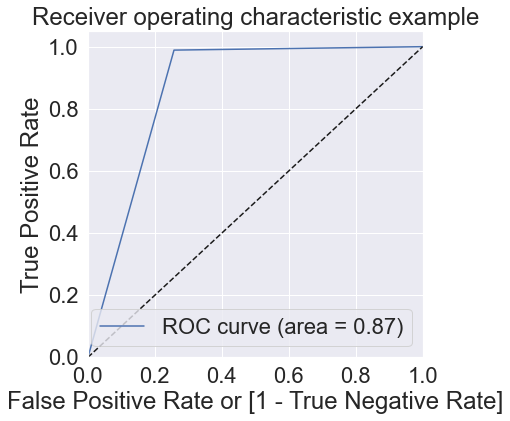

(array([0.       , 0.2571007, 1.       ]),
 array([0.        , 0.98891394, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [115]:
PlotROC(y_train_df.sentiments, y_train_df.final_predicted)

     prob  accuracy     sensi     speci
0.0   0.0  0.887037  1.000000  0.000000
0.1   0.1  0.895579  0.999342  0.080782
0.2   0.2  0.909538  0.998638  0.209886
0.3   0.3  0.926080  0.997228  0.367392
0.4   0.4  0.947373  0.994316  0.578753
0.5   0.5  0.961123  0.988914  0.742899
0.6   0.6  0.963457  0.976982  0.857248
0.7   0.7  0.945914  0.947435  0.933973
0.8   0.8  0.901163  0.892287  0.970859
0.9   0.9  0.789200  0.763670  0.989672


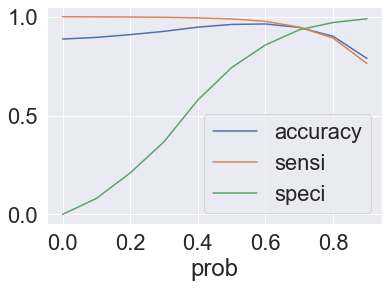

In [116]:
#Finding Optimal Cutoff Point
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
PlotOptimalCutoff(y_train_df)

In [117]:
# here around 0.7 is the optimal cutoff
cut_off_prob = 0.75
y_train_df=PredictSentimentsWithProbability(LRModel2,train_tfidf,y_train,cut_off_prob)
y_train_df

Sensitivity/Recall : 0.9265783540022547
Specificity: 0.9568424935448174
False Positive Rate: 0.04315750645518259
Positive predictive value: 0.9941034169942546
Negative Predictive value: 0.624007697859033
sklearn precision score value: 0.9941034169942546


,sentiments,sentiments_prob,final_predicted
2602,1.0,0.999200,1
4212,1.0,0.970549,1
3819,0.0,0.472470,0
8805,1.0,0.999958,1
19952,1.0,0.989588,1
...,...,...,...
26901,1.0,0.807843,1
7985,1.0,0.989154,1
18687,1.0,0.566861,0
19776,0.0,0.472752,0


In [118]:
#print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_test_pred)))
#print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
#print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

In [119]:
# for test
y_test_df=PredictSentimentsWithProbability(LRModel2,test_tfidf,y_test,cut_off_prob)
y_test_df

Sensitivity/Recall : 0.8933383233532934
Specificity: 0.7576219512195121
False Positive Rate: 0.2423780487804878
Positive predictive value: 0.9677680924386783
Negative Predictive value: 0.46579194001874413
sklearn precision score value: 0.9677680924386783


,sentiments,sentiments_prob,final_predicted
17173,1.0,0.977273,1
28361,1.0,0.946507,1
18990,1.0,0.849900,1
1948,1.0,0.907066,1
10283,1.0,0.793583,1
...,...,...,...
15439,1.0,0.621016,0
8578,1.0,0.991739,1
19714,1.0,0.995942,1
5865,1.0,0.995610,1


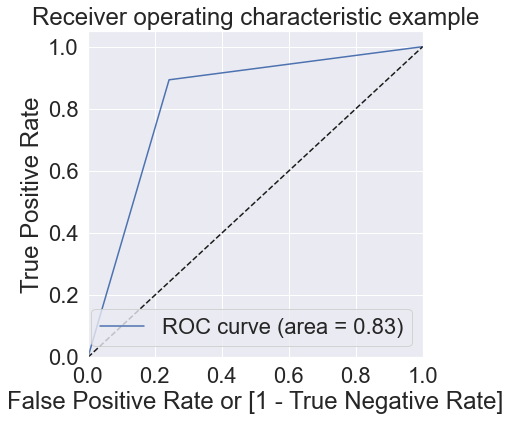

(array([0.        , 0.24237805, 1.        ]),
 array([0.        , 0.89333832, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [120]:
PlotROC(y_test_df.sentiments,y_test_df.final_predicted)

AUC for train 0.9834348949420506
AUC for test 0.9289820701584636


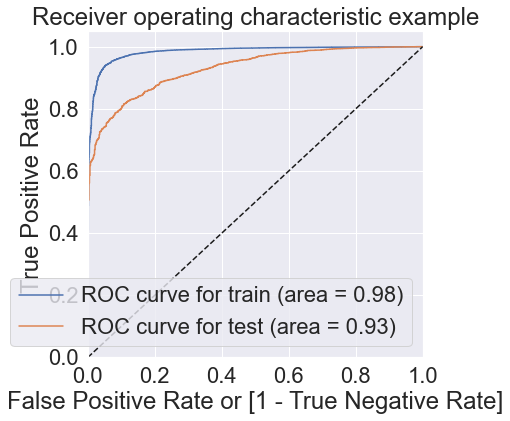

In [121]:
y_train_proba=LRModel2.predict_proba(train_tfidf)[:,1]
y_test_proba=LRModel2.predict_proba(test_tfidf)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_train,y_train_proba)
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,y_test_proba)
print("AUC for train" , metrics.auc(fpr,tpr))
print("AUC for test" , metrics.auc(fpr1,tpr1))
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve for train (area = %0.2f)' % metrics.auc(fpr,tpr ))
plt.plot( fpr1, tpr1, label='ROC curve for test (area = %0.2f)' % metrics.auc(fpr1,tpr1) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [60]:
# Save the model
import joblib 

# Save the model as a pickle in a file 
joblib.dump(LRModel2, 'LRModel2.pkl') 

['LRModel2.pkl']

In [62]:
df_final.to_csv("processed_txts.csv")
#Save vectorizer.vocabulary_
joblib.dump(tfidf_vect,"tfidf_vect.pkl")
#df_final.shape
#Sensitivity for train 0.92, train_auc= 0.98
# Sensitivity for test 0.89, test auc = 0.92

['tfidf_vect.pkl']

In [82]:
#RandomForest

In [60]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, sentiments rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 21288
Before OverSampling, counts of label '0': 2711 

Before OverSampling, sentiments rate : 88.7% 



In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seed)
X_train_smote, y_train_smote = sm.fit_sample(train_tfidf, y_train)

In [69]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))
print("After OverSampling, sentiments event rate : {}% \n".format(round(sum(y_train_smote==1)/len(y_train_smote)*100,2)))


After OverSampling, the shape of train_X: (42576, 16973)
After OverSampling, the shape of train_y: (42576,) 

After OverSampling, counts of label '1': 21288
After OverSampling, counts of label '0': 21288
After OverSampling, sentiments event rate : 50.0% 



In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': range(10, 30, 5)}
RFModel = RandomForestClassifier()
Kfold=5
rf_gs = RandomizedSearchCV(RFModel, parameters, cv=Kfold,scoring="f1", return_train_score=True,random_state=seed)
rf_gs.fit(train_tfidf,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(10, 30, 5)},
                   random_state=43, return_train_score=True, scoring='f1')

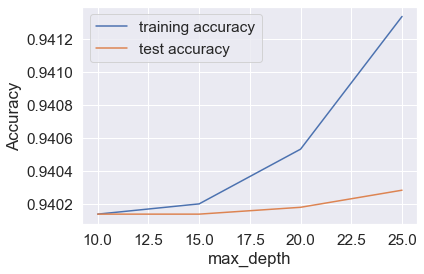

In [72]:
# Tuning max_depth
scores = rf_gs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
#max_depth=10
# Tuning n_estimators
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=10,random_state=seed)
rf_gs = RandomizedSearchCV(rf1, parameters, 
                    cv=Kfold, 
                   scoring="recall", return_train_score=True)

In [74]:
rf_gs.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=43),
                   param_distributions={'n_estimators': range(50, 150, 25)},
                   return_train_score=True, scoring='recall')

In [75]:
def PlotTrainTestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

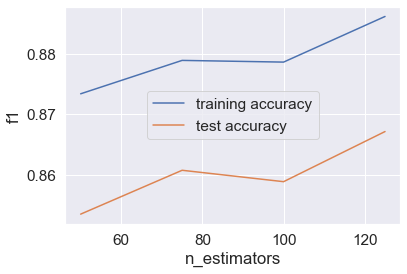

In [84]:
PlotTrainTestAcc(rf_gs.cv_results_,'n_estimators')

In [87]:
#n_estimators=100
#Tuning max_features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=10,n_estimators=100,random_state=seed)
rf_gs = RandomizedSearchCV(rf3, parameters, 
                    cv=Kfold, 
                   scoring="f1", return_train_score=True)

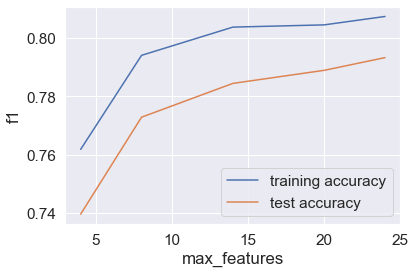

In [88]:
rf_gs.fit(X_train_smote,y_train_smote)
PlotTrainTestAcc(rf_gs.cv_results_,'max_features')

In [89]:
#max_features=8
# Tuning min_sample_leaf
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=10,n_estimators=100,max_features=8,random_state=seed)
rf_gs = RandomizedSearchCV(rf4, parameters, 
                    cv=Kfold, 
                   scoring="f1", return_train_score=True)

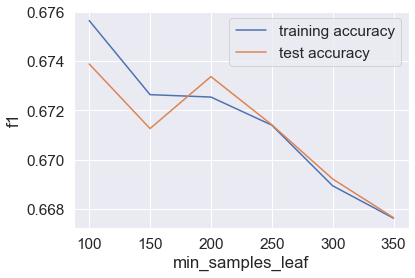

In [90]:
rf_gs.fit(X_train_smote,y_train_smote)
PlotTrainTestAcc(rf_gs.cv_results_,'min_samples_leaf')

In [91]:
#min_samples_leaf=100
#Tuning min_sample_split
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=10,n_estimators=100,max_features=8,min_samples_leaf=100,random_state=seed)
rf_gs = RandomizedSearchCV(rf5, parameters, 
                    cv=Kfold, 
                   scoring="f1", return_train_score=True)

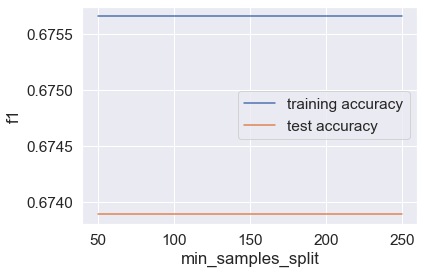

In [92]:
rf_gs.fit(X_train_smote,y_train_smote)
PlotTrainTestAcc(rf_gs.cv_results_,'min_samples_split')

In [99]:
#min_samples_split=50
#Tunned Randaom Forest
rf_final = RandomForestClassifier(max_depth=10,
                                  n_estimators=100,
                                  max_features=8,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=seed)

In [100]:
print("Model performance on Train data:")
FitModel(rf_final,X_train_smote,y_train_smote)

Model performance on Train data:

Model Report
Accuracy : 0.6075
Recall/Sensitivity : 0.2934


In [101]:
# predict on test data
dt_test_pred = rf_final.predict(test_tfidf)

In [102]:
print("Model performance on Test data:")
ModelMetrics(y_test,dt_test_pred)

Model performance on Test data:
Sensitivity/Recall : 0.3001497005988024
Specificity: 0.8353658536585366
False Positive Rate: 0.16463414634146342
Positive predictive value: 0.9369158878504673
Negative Predictive value: 0.12779850746268656
sklearn precision score value: 0.9369158878504673


In [103]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = PredictSentimentsWithProbability(rf_final,X_train_smote,y_train_smote,cut_off_prob)
y_train_df.head()

Sensitivity/Recall : 0.29340473506200676
Specificity: 0.9215990229237129
False Positive Rate: 0.07840097707628711
Positive predictive value: 0.7891345546430828
Negative Predictive value: 0.5660252156602521
sklearn precision score value: 0.7891345546430828


,sentiments,sentiments_prob,final_predicted
0,1.0,0.499912,0
1,1.0,0.499912,0
2,0.0,0.499912,0
3,1.0,0.505138,1
4,1.0,0.499912,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.500000  1.000000  0.000000
0.3   0.3  0.500000  1.000000  0.000000
0.4   0.4  0.500000  1.000000  0.000000
0.5   0.5  0.607502  0.293405  0.921599
0.6   0.6  0.500000  0.000000  1.000000
0.7   0.7  0.500000  0.000000  1.000000
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


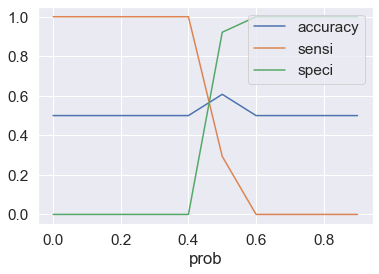

In [104]:
# finding cut-off with the right balance of the metrices
PlotOptimalCutoff(y_train_df)

In [105]:
cut_off_prob=0.5
PredictSentimentsWithProbability(rf_final,X_train_smote,y_train_smote,cut_off_prob)

Sensitivity/Recall : 0.29340473506200676
Specificity: 0.9215990229237129
False Positive Rate: 0.07840097707628711
Positive predictive value: 0.7891345546430828
Negative Predictive value: 0.5660252156602521
sklearn precision score value: 0.7891345546430828


,sentiments,sentiments_prob,final_predicted
0,1.0,0.499912,0
1,1.0,0.499912,0
2,0.0,0.499912,0
3,1.0,0.505138,1
4,1.0,0.499912,0
...,...,...,...
42571,0.0,0.502880,1
42572,0.0,0.498030,0
42573,0.0,0.499912,0
42574,0.0,0.497809,0


In [106]:
y_test_df=PredictSentimentsWithProbability(rf_final,test_tfidf,y_test,cut_off_prob)
y_test_df.head()

Sensitivity/Recall : 0.3001497005988024
Specificity: 0.8353658536585366
False Positive Rate: 0.16463414634146342
Positive predictive value: 0.9369158878504673
Negative Predictive value: 0.12779850746268656
sklearn precision score value: 0.9369158878504673


,sentiments,sentiments_prob,final_predicted
17173,1.0,0.504189,1
28361,1.0,0.501973,1
18990,1.0,0.499912,0
1948,1.0,0.503744,1
10283,1.0,0.502067,1


In [107]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,dt_test_pred)))
print("Recall : {}".format(metrics.recall_score(y_test,dt_test_pred)))
print("Precision : {}".format(metrics.precision_score(y_test,dt_test_pred)))

Accuracy : 0.3586666666666667
Recall : 0.3001497005988024
Precision : 0.9369158878504673


AUC for train 0.6291478888673104
AUC for test 0.6007757731488244


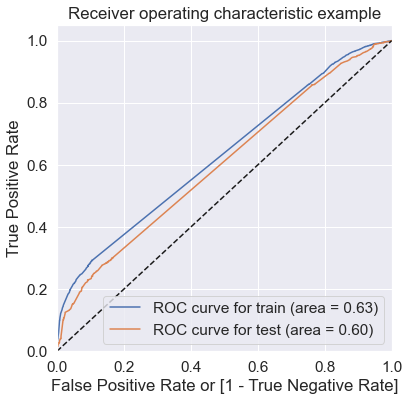

In [108]:
y_train_proba=rf_final.predict_proba(train_tfidf)[:,1]
y_test_proba=rf_final.predict_proba(test_tfidf)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_train,y_train_proba)
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,y_test_proba)
print("AUC for train" , metrics.auc(fpr,tpr))
print("AUC for test" , metrics.auc(fpr1,tpr1))
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve for train (area = %0.2f)' % metrics.auc(fpr,tpr ))
plt.plot( fpr1, tpr1, label='ROC curve for test (area = %0.2f)' % metrics.auc(fpr1,tpr1) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [92]:
# train sensitivity 
# test sensitivity 

In [93]:
#Boosting Models
# GradientBoostClassifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(random_state=seed)
FitModel(GBCModel, X_train_smote, y_train_smote)


Model Report
Accuracy : 0.8332
Recall/Sensitivity : 0.7131


In [95]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=seed), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=Kfold)
gsearch1.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=43,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 150, 10)}, scoring='f1')

In [96]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.8586337427871731)

In [97]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=seed), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=Kfold)
gsearch2.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=43,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1')

In [98]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9037971466053737)

In [99]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=seed), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=Kfold)
gsearch3.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=43,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10)}, scoring='f1')

In [100]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.8820978274125915)

In [101]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=seed),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=Kfold)
gsearch4.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=43,
                                                  subsample=0.8),
             iid=False, n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [102]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 19}, 0.7987859288802044)

In [103]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=19,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=seed)
FitModel(gbm_final, X_train_smote, y_train_smote)


Model Report
Accuracy : 0.7974
Recall/Sensitivity : 0.8391


In [104]:
# predictions on Test data
dtest_predictions = gbm_final.predict(test_tfidf)

In [105]:
# model Performance on test data
ModelMetrics(y_test,dtest_predictions)

Sensitivity/Recall : 0.8411302395209581
Specificity: 0.5228658536585366
False Positive Rate: 0.4771341463414634
Positive predictive value: 0.934900166389351
Negative Predictive value: 0.287751677852349
sklearn precision score value: 0.934900166389351


In [106]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = PredictSentimentsWithProbability(gbm_final,X_train_smote,y_train_smote,cut_off_prob)
y_train_df.head()

Sensitivity/Recall : 0.8391112363773018
Specificity: 0.7555900037579857
False Positive Rate: 0.2444099962420143
Positive predictive value: 0.7744298968178271
Negative Predictive value: 0.8244490005125577
sklearn precision score value: 0.7744298968178271


,sentiments,sentiments_prob,final_predicted
0,1.0,0.600362,1
1,1.0,0.649666,1
2,0.0,0.491621,0
3,1.0,0.685349,1
4,1.0,0.717882,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.504181  1.000000  0.008362
0.2   0.2  0.525766  0.999107  0.052424
0.3   0.3  0.562688  0.994269  0.131107
0.4   0.4  0.636838  0.971345  0.302330
0.5   0.5  0.797351  0.839111  0.755590
0.6   0.6  0.676860  0.364243  0.989478
0.7   0.7  0.541878  0.084179  0.999577
0.8   0.8  0.506342  0.012824  0.999859
0.9   0.9  0.500188  0.000376  1.000000


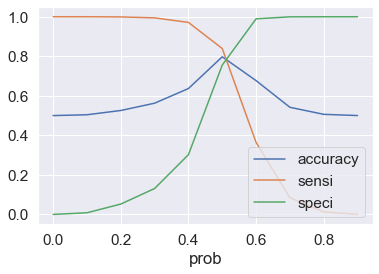

In [107]:
PlotOptimalCutoff(y_train_df)

In [108]:
cut_off_prob=0.5
PredictSentimentsWithProbability(gbm_final,X_train_smote,y_train_smote,cut_off_prob)

Sensitivity/Recall : 0.8391112363773018
Specificity: 0.7555900037579857
False Positive Rate: 0.2444099962420143
Positive predictive value: 0.7744298968178271
Negative Predictive value: 0.8244490005125577
sklearn precision score value: 0.7744298968178271


,sentiments,sentiments_prob,final_predicted
0,1.0,0.600362,1
1,1.0,0.649666,1
2,0.0,0.491621,0
3,1.0,0.685349,1
4,1.0,0.717882,1
...,...,...,...
42571,0.0,0.366771,0
42572,0.0,0.333841,0
42573,0.0,0.527364,1
42574,0.0,0.142255,0


In [109]:
y_test_df= PredictSentimentsWithProbability(gbm_final,test_tfidf,y_test,cut_off_prob)
y_test_df.head()

Sensitivity/Recall : 0.8411302395209581
Specificity: 0.5228658536585366
False Positive Rate: 0.4771341463414634
Positive predictive value: 0.934900166389351
Negative Predictive value: 0.287751677852349
sklearn precision score value: 0.934900166389351


,sentiments,sentiments_prob,final_predicted
17173,1.0,0.567349,1
28361,1.0,0.573918,1
18990,1.0,0.506251,1
1948,1.0,0.524230,1
10283,1.0,0.543642,1


In [110]:
#XGBOOSTCLASSIFIER

In [112]:
# count examples in each class
#counter = Counter(y)
# estimate scale_pos_weight value
#estimate = counter[0] / counter[1]
#print('Estimate: %.3f' % estimate)

In [109]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    #scale_pos_weight=1,
                    seed=seed)

In [110]:
# Model fit and performance on Train data
FitModel(xgb1, X_train_smote, y_train_smote)


Model Report
Accuracy : 0.9617
Recall/Sensitivity : 0.9365


In [112]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
g_search1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, seed=seed), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=Kfold)
g_search1.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=43,
                                     subsample=0.8, tree_meth

In [113]:
g_search1.best_params_, g_search1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.8923199593229251)

In [114]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
g_search2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=seed), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=Kfold)
g_search2.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=43, subsample=0.8,
                                     tree_method=

In [116]:
g_search2.best_params_, g_search2.best_score_

({'gamma': 0.0}, 0.8923199593229251)

In [117]:
# Final XGBClassifier
xgb_final = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=seed)

In [118]:
# Fit Train data
FitModel(xgb_final, X_train_smote, y_train_smote)



Model Report
Accuracy : 0.9208
Recall/Sensitivity : 0.8598


In [119]:
# Prediction on Test data
xg_test_pred = xgb_final.predict(test_tfidf)

In [120]:
# Model evaluation on Test data
ModelMetrics(y_test,xg_test_pred)

Sensitivity/Recall : 0.8362649700598802
Specificity: 0.8033536585365854
False Positive Rate: 0.19664634146341464
Positive predictive value: 0.9719443236189648
Negative Predictive value: 0.37589158345221113
sklearn precision score value: 0.9719443236189648


In [121]:
cut_off_prob=0.5
y_train_df = PredictSentimentsWithProbability(xgb_final,X_train_smote,y_train_smote,cut_off_prob)
y_train_df.head()

Sensitivity/Recall : 0.8597801578354002
Specificity: 0.9819146937241638
False Positive Rate: 0.01808530627583615
Positive predictive value: 0.979398544520548
Negative Predictive value: 0.8750418620227729
sklearn precision score value: 0.979398544520548


,sentiments,sentiments_prob,final_predicted
0,1.0,0.977770,1
1,1.0,0.717267,1
2,0.0,0.321618,0
3,1.0,0.998339,1
4,1.0,0.929406,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.679655  0.999906  0.359404
0.2   0.2  0.782483  0.998450  0.566516
0.3   0.3  0.859992  0.988632  0.731351
0.4   0.4  0.934000  0.917042  0.950958
0.5   0.5  0.920847  0.859780  0.981915
0.6   0.6  0.901447  0.811255  0.991638
0.7   0.7  0.867014  0.737223  0.996806
0.8   0.8  0.829035  0.659057  0.999014
0.9   0.9  0.753288  0.506717  0.999859


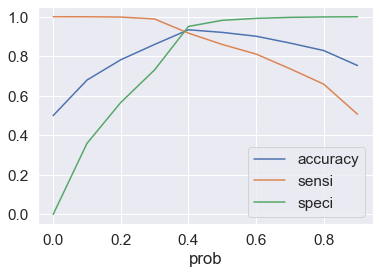

In [122]:
# Finding optimal cut-off probability
PlotOptimalCutoff(y_train_df)

In [123]:
# change accordingly 
#Selecting 0.45 as cut-off in an attempt to improve recall rate
cut_off_prob=0.45
PredictSentimentsWithProbability(xgb_final,train_tfidf,y_train,cut_off_prob)


Sensitivity/Recall : 0.8857102593010147
Specificity: 0.9011434894872741
False Positive Rate: 0.09885651051272593
Positive predictive value: 0.9859854625320295
Negative Predictive value: 0.501025430680886
sklearn precision score value: 0.9859854625320295


,sentiments,sentiments_prob,final_predicted
2602,1.0,0.977770,1
4212,1.0,0.717267,1
3819,0.0,0.321618,0
8805,1.0,0.998339,1
19952,1.0,0.929406,1
...,...,...,...
26901,1.0,0.378334,0
7985,1.0,0.898680,1
18687,1.0,0.268345,0
19776,0.0,0.261021,0


AUC for train 0.9583079052438664
AUC for test 0.8999138251697822


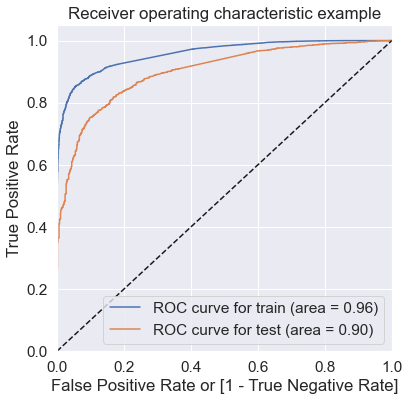

In [140]:
xgb_train_proba=xgb_final.predict_proba(train_tfidf)[:,1]
xgb_test_proba=xgb_final.predict_proba(test_tfidf)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_train,xgb_train_proba)
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,xgb_test_proba)
print("AUC for train" , metrics.auc(fpr,tpr))
print("AUC for test" , metrics.auc(fpr1,tpr1))
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve for train (area = %0.2f)' % metrics.auc(fpr,tpr ))
plt.plot( fpr1, tpr1, label='ROC curve for test (area = %0.2f)' % metrics.auc(fpr1,tpr1) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [125]:
##Multinomial Naive Bayes

In [126]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb_model=MultinomialNB()


In [127]:
FitModel(mnb_model, X_train_smote, y_train_smote)


Model Report
Accuracy : 0.8983
Recall/Sensitivity : 0.8769


In [128]:
mnb_pred_train=mnb_model.predict(X_train_smote)

In [129]:
# Model evaluation on Test data
ModelMetrics(y_train_smote,mnb_pred_train)

Sensitivity/Recall : 0.8769259676813228
Specificity: 0.9196730552423901
False Positive Rate: 0.08032694475760992
Positive predictive value: 0.9160859750711552
Negative Predictive value: 0.8819713487701595
sklearn precision score value: 0.9160859750711552


In [130]:
# Prediction on Test data
mnb_pred_test = mnb_model.predict(test_tfidf)

In [131]:
# Model evaluation on Test data
ModelMetrics(y_test,mnb_pred_test)

Sensitivity/Recall : 0.8607784431137725
Specificity: 0.6570121951219512
False Positive Rate: 0.3429878048780488
Positive predictive value: 0.9533678756476683
Negative Predictive value: 0.3668085106382979
sklearn precision score value: 0.9533678756476683


In [132]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,mnb_pred_test)))
print("Recall : {}".format(metrics.recall_score(y_test,mnb_pred_test)))
print("Precision : {}".format(metrics.precision_score(y_test,mnb_pred_test)))

Accuracy : 0.8385
Recall : 0.8607784431137725
Precision : 0.9533678756476683


AUC for train 0.9501373705965827
AUC for test 0.8595849459617351


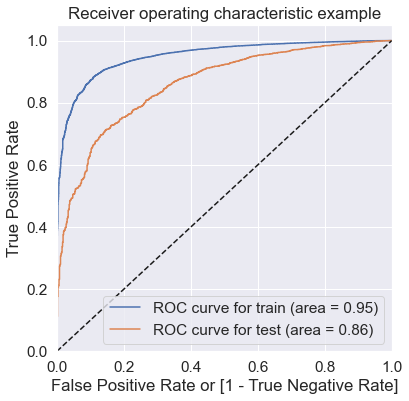

In [139]:
mnb_train_proba=mnb_model.predict_proba(train_tfidf)[:,1]
mnb_test_proba=mnb_model.predict_proba(test_tfidf)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_train,mnb_train_proba)
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,mnb_test_proba)
print("AUC for train" , metrics.auc(fpr,tpr))
print("AUC for test" , metrics.auc(fpr1,tpr1))
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve for train (area = %0.2f)' % metrics.auc(fpr,tpr ))
plt.plot( fpr1, tpr1, label='ROC curve for test (area = %0.2f)' % metrics.auc(fpr1,tpr1) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [151]:
#fpr,tpr,_=metrics.roc_curve(y_train,LRModel2.predict_proba(test_tfidf)[:,1])
#fpr1,tpr1,_=metrics.roc_curve(y_test,xgb_final.predict_proba(test_tfidf)[:,1])
#fpr2,tpr2,_=metrics.roc_curve(y_test,mnb_model.predict_proba(test_tfidf)[:,1])
#print("AUC for LR" , metrics.auc(fpr,tpr))
#print("AUC for XG BOOST" , metrics.auc(fpr1,tpr1))
#print("AUC for MNaiveBayes" , metrics.auc(fpr2,tpr2))

In [61]:
# recommendation systems
#reviews_df=reviews_df.dropna(subset=['reviews_username'])
#reviews_final=reviews_df

In [122]:
reviews_df=reviews_df.groupby(['reviews_username','name'])['reviews_rating'].mean().reset_index()

In [123]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.30, random_state=seed)

In [124]:
print(train.shape)
print(test.shape)

(19311, 3)
(8277, 3)


In [125]:
train.head(2)

,reviews_username,name,reviews_rating
22234,ruth,Clorox Disinfecting Wipes Value Pack Scented 1...,5.0
24652,superd,Tostitos Bite Size Tortilla Chips,5.0


In [126]:
##train[['id','name','reviews_rating']][train[['id','name','reviews_rating']].duplicated()]

In [127]:
# Pivot the train ratings' dataset into matrix format in which columns are movies and the rows are user IDs.
user_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

user_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [129]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [130]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [131]:
dummy_train.shape

(17838, 248)

In [132]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [133]:
##Using adjusted Cosine

In [134]:
# Create a user-movie matrix.
user_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [135]:
user_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
mean = np.nanmean(user_pivot, axis=1)
df_subtracted = (user_pivot.T-mean).T

In [137]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
from sklearn.metrics.pairwise import pairwise_distances

In [139]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [140]:
##Prediction - User User

In [141]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
user_predicted_ratings = np.dot(user_correlation, user_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
user_predicted_ratings.shape

(17838, 248)

In [144]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user namerebecca
rebecca


In [146]:
user_final_rating.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d
#user_final_rating.loc[user_input].sort_values()[-20:]
#pd.DataFrame(user_final_rating.loc[user_input]).rename(columns={"name": "name", user_input: "reviews_rating"}).sort_values(by="reviews_rating",ascending=False)[0:20]

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  21.746477
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                              9.025315
Mike Dave Need Wedding Dates (dvd + Digital)                                                      8.564350
Burt's Bees Lip Shimmer, Raisin                                                                   5.356288
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com     4.881741
Coty Airspun Face Powder, Translucent Extra Coverage                                              4.127450
The Honest Company Laundry Detergent                                                              3.963380
Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home                                      3.766211
The Resident Evil Collection 5 Discs (blu-Ray)                                                    3.464385
Pendaflex174 Divide It Up File F

In [148]:
#Evaluation - User User

In [96]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1076, 3)

In [97]:
common.head()

,reviews_username,name,reviews_rating
25745,timothy,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,5.0
14641,lance,Godzilla 3d Includes Digital Copy Ultraviolet ...,4.0
11481,jean,Clorox Disinfecting Wipes Value Pack Scented 1...,5.0
24661,supergirl,L'or233al Paris Elvive Extraordinary Clay Reba...,4.0
18637,mrfrost,Mike Dave Need Wedding Dates (dvd + Digital),5.0


In [98]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [99]:
common_user_based_matrix.shape

(915, 113)

In [100]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [101]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
user_correlation_df['username'] = df_subtracted.index
user_correlation_df.set_index('username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17828,17829,17830,17831,17832,17833,17834,17835,17836,17837
username,,,,,,,,,,,,,,,,,,,,,
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
common.head(1)

,reviews_username,name,reviews_rating
25745,timothy,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,5.0


In [104]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [105]:
user_correlation_df_1.shape

(915, 17838)

In [106]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [107]:
user_correlation_df_3 = user_correlation_df_2.T

In [108]:
user_correlation_df_3.head()

,1234,123charlie,1witch,37f5p,50cal,abbey,abby,acv4217,adam,aep1010,...,woody,woottos,xmom,xstr8edgex,yohnie1,yummy,yvonne,zipper,zippy,zitro
username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [109]:
user_correlation_df_3.shape
#common_user_based_matrix.shape

(915, 915)

In [110]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 3.11004234, 0.        , ..., 0.        , 0.04848811,
        1.15470054],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.38675135, 0.        , ..., 0.        , 2.90949434,
        2.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [111]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [112]:
dummy_test.shape

(915, 113)

In [113]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [114]:
common_user_predicted_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Toy Story Kids' Woody Accessory Kit,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [116]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [117]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [118]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5700786852423074


In [110]:
##Using Item similarity

In [111]:
item_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

item_pivot.head()

reviews_username,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zsarah,zsazsa,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
mean = np.nanmean(item_pivot, axis=1)
df_subtracted = (item_pivot.T-mean).T

In [113]:
df_subtracted.head()

reviews_username,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zsarah,zsazsa,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,0.268421,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
from sklearn.metrics.pairwise import pairwise_distances

In [115]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00556526  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00556526  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [116]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [117]:
##Prediction - Item Item

In [118]:
item_predicted_ratings = np.dot((item_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.03219031, 0.        , ..., 0.00645327, 0.        ,
        0.01784792],
       [0.        , 0.02575225, 0.        , ..., 0.00516261, 0.        ,
        0.01427833],
       [0.        , 0.        , 0.        , ..., 0.0016896 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0016896 , 0.        ,
        0.        ],
       [0.        , 0.04219839, 0.        , ..., 0.01115828, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00135168, 0.        ,
        0.        ]])

In [119]:
item_predicted_ratings.shape

(17838, 248)

In [120]:
dummy_train.shape

(17838, 248)

In [121]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
02dakota,0.0,0.032190,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.017201,0.0,0.0,0.0,0.006453,0.000000,0.017848
02deuce,0.0,0.025752,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.013761,0.0,0.0,0.0,0.005163,0.000000,0.014278
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001833,0.003713,0.0,...,0.0,0.0,0.0,0.009094,0.0,0.0,0.0,0.001690,0.000000,0.000000
08dallas,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
09mommy11,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004359,0.006218,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.082970,0.002484,0.000000


In [122]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name1234
1234


In [123]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Clorox Disinfecting Bathroom Cleaner                                                             0.700731
Moom Express Pre Waxed Strips For Face & Bikini                                                  0.133505
Various Artists - Choo Choo Soul (cd)                                                            0.130433
Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint                                       0.092285
100:Complete First Season (blu-Ray)                                                              0.085646
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                             0.081944
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    0.072269
Coty Airspun Face Powder, Translucent Extra Coverage                                             0.063697
Ogx Conditioner, Hydrating Teatree Mint                                                          0.050950
Stargate (ws) (ultimate Edition) (directo

In [124]:
#Evaluation

In [125]:
test.columns

Index(['reviews_username', 'name', 'reviews_rating'], dtype='object')

In [126]:
#train_uniq

In [127]:
common =  test[test.name.isin(train.name)]
common.shape

(8248, 3)

In [128]:
common.head(4)

,reviews_username,name,reviews_rating
18416,monkeygirl5,Tostitos Bite Size Tortilla Chips,5.0
11081,james mcdonald,Chester's Cheese Flavored Puffcorn Snacks,5.0
16718,maseawee,Godzilla 3d Includes Digital Copy Ultraviolet ...,4.0
12019,jhosborne,Planes: Fire Rescue (2 Discs) (includes Digita...,5.0


In [129]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [130]:
common_item_based_matrix.shape

(194, 7963)

In [131]:
item_correlation_df = pd.DataFrame(item_correlation)

In [132]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
df_subtracted.index

Index(['0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest',
       '100:Complete First Season (blu-Ray)',
       '2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black',
       '2x Ultra Era with Oxi Booster, 50fl oz',
       '4C Grated Parmesan Cheese 100% Natural 8oz Shaker',
       'Africa's Best No-Lye Dual Conditioning Relaxer System Super',
       'Alberto VO5 Salon Series Smooth Plus Sleek Shampoo',
       'Alex Cross (dvdvideo)', 'All,bran Complete Wheat Flakes, 18 Oz.',
       'Ambi Complexion Cleansing Bar',
       ...
       'Voortman Sugar Free Fudge Chocolate Chip Cookies',
       'Wagan Smartac 80watt Inverter With Usb',
       'Wallmount Server Cabinet (450mm, 9 RU)',
       'Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee',
       'WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black',
       'Weleda Everon Lip Balm', 'Wilton Black Dots Standard Baking Cups',
       'Windex O

In [134]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
list_name = common.name.tolist()

In [136]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [137]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [138]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03729771, 0.01931419, ..., 0.        , 0.03219031,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00754696, 0.00387196, ..., 0.        , 0.00645327,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01070875, ..., 0.        , 0.01784792,
        0.01293414]])

In [140]:
common_item_predicted_ratings.shape

(194, 7963)

In [141]:
dummy_test.shape

(915, 113)

In [147]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [148]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [149]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [150]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [151]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5893084929294345


In [119]:
# Take the user ID as input
user_input = "1234"
print(user_input)

1234


In [120]:
final_recomended_prods = pd.DataFrame(user_final_rating.loc[user_input].sort_values(ascending=False)[0:20])
final_recomended_prods

,1234
name,
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),30.396275
The Resident Evil Collection 5 Discs (blu-Ray),26.279946
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),19.498721
Red (special Edition) (dvdvideo),16.986419
Tostitos Bite Size Tortilla Chips,14.468224
Clorox Disinfecting Bathroom Cleaner,10.838323
Jason Aldean - They Don't Know,9.742555
"Coty Airspun Face Powder, Translucent Extra Coverage",6.947049
Alex Cross (dvdvideo),5.882843


In [122]:
lr_final=joblib.load('LRModel2.pkl')
top20_prod={}
top20_prod['name']=[]
top20_prod["brand"]=[]
top20_prod["categories"]=[]
top20_prod['manufacturer']=[]
recom_prod=list(final_recomended_prods.index)
from collections import Counter
pos_rated_prod=[]

for i in range(20):
    top20_prod["brand"].append(df_final.loc[df_final.name==recom_prod[i],"brand"].values[0])
    top20_prod["categories"].append(df_final.loc[df_final.name==recom_prod[i],"categories"].values[0])
    top20_prod['manufacturer'].append(df_final.loc[df_final.name==recom_prod[i],"manufacturer"].values[0])
    top20_prod['name'].append(final_recomended_prods.index[i])
    reviews_texts=list(df_final.loc[df_final.name==recom_prod[i],"reviews_text"])
    y=Counter(lr_final.predict(tfidf_vect.transform(reviews_texts)))[1]
    pos_rated_prod.append(y)

                                            
top20_df=pd.DataFrame(top20_prod)
#top20_df
top20_df["positive_ratings"]=pos_rated_prod
top5_df=top20_df.sort_values(by="positive_ratings",ascending=False)[:5]

In [123]:
#recom_prod=list(final_recomended_prods.index)
top20_df

,name,brand,categories,manufacturer,positive_ratings
0,Planes: Fire Rescue (2 Discs) (includes Digita...,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,1083
1,The Resident Evil Collection 5 Discs (blu-Ray),Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,701
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,649
3,Red (special Edition) (dvdvideo),Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,644
4,Tostitos Bite Size Tortilla Chips,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Tostitos,223
5,Clorox Disinfecting Bathroom Cleaner,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,1911
6,Jason Aldean - They Don't Know,Warner Music Group,"Music on CD or Vinyl,Country Music on CD or Vi...",Broken Bow,189
7,"Coty Airspun Face Powder, Translucent Extra Co...",Coty,"Personal Care,Makeup,Concealer & Foundation,Fo...",Coty brands,148
8,Alex Cross (dvdvideo),Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,117
9,Chester's Cheese Flavored Puffcorn Snacks,Chester's,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Frito-Lay,144


In [124]:
#from collections import Counter
#pos_rated_prod=[]
top5_df
#for i in range(20):
    #reviews_texts=list(df_final.loc[df_final.name==recom_prod[i],"reviews_text"])
    #x=Counter(LRModel2.predict(tfidf_vect.transform(reviews_texts)))[1]
    #pos_rated_prod.append(x)


#top20_df["positive_ratings"]=pos_rated_prod
#top5_df=top20_df.sort_values(by="positive_ratings",ascending=False)[:5]
    


    
    
    

,name,brand,categories,manufacturer,positive_ratings
5,Clorox Disinfecting Bathroom Cleaner,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,1911
0,Planes: Fire Rescue (2 Discs) (includes Digita...,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,1083
13,"Burt's Bees Lip Shimmer, Raisin",Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Li...",Burt's Bees,796
1,The Resident Evil Collection 5 Discs (blu-Ray),Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,701
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,649


In [155]:
#top5_df

,name,brand,categories,manufacturer,positive_ratings
5,Clorox Disinfecting Bathroom Cleaner,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,1914
0,Planes: Fire Rescue (2 Discs) (includes Digita...,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,1083
13,"Burt's Bees Lip Shimmer, Raisin",Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Li...",Burt's Bees,796
1,The Resident Evil Collection 5 Discs (blu-Ray),Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,701
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,649
